In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv


# Exploratory Data Analysis for Netflix Dataset

This project performs Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset.  
The goal is to understand the structure of the data, clean missing values, visualize patterns, and extract meaningful insights.

# <h1 style='text-align:center;'> Netflix </h1>

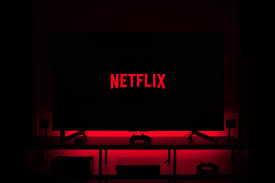

In [18]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Drop the nan values for visualization process **

In [48]:
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)
df.dropna(subset=['date_added'], inplace=True)

In [20]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Understanding

The dataset contains information about movies and TV shows available on Netflix, including title, director, cast, country, release year, rating, and genre.  
The dataset includes both numerical and categorical features that help in analyzing Netflix content trends.

In [21]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Handling Missing Values

The dataset contains missing values in several columns such as director, cast, country, and rating.  
These missing values were handled by replacing them with "Unknown" or removing rows where necessary to improve data quality.

In [22]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## Removing Duplicates

Duplicate records were checked and removed to ensure the dataset contains only unique and accurate entries.

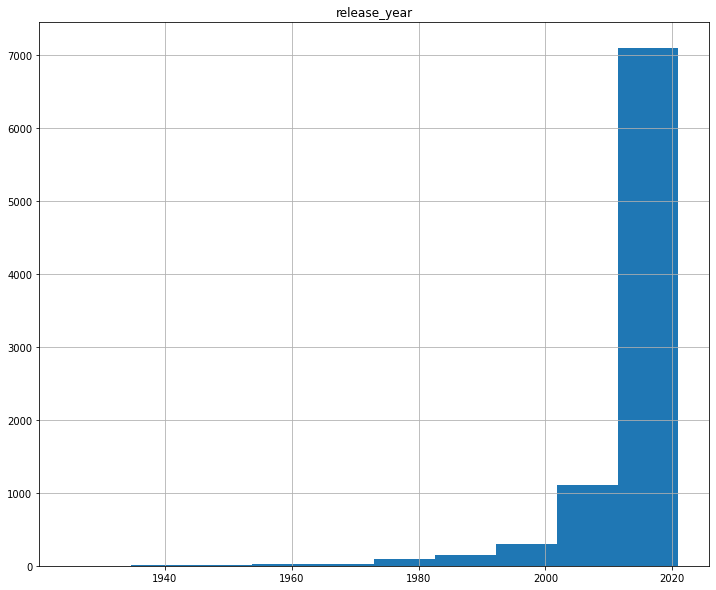

In [23]:
df.hist(figsize=(12,10))
plt.show()

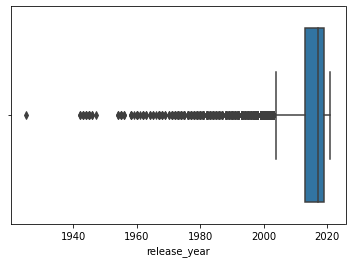

In [42]:
for col in df.select_dtypes(include=np.number):
    sns.boxplot(x=df[col])
    plt.show()

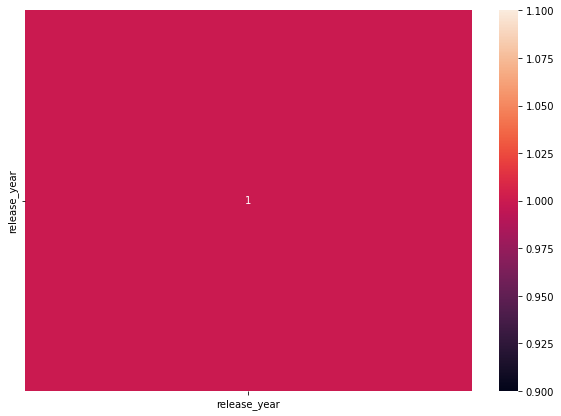

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Types**

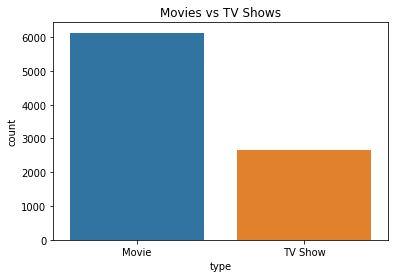

In [49]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()

## Movies vs TV Shows Analysis

The analysis shows that Netflix contains more movies than TV shows.  
This indicates that Netflix focuses more on movie content compared to TV series.

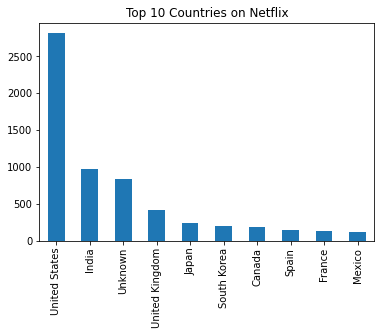

In [50]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title("Top 10 Countries on Netflix")
plt.show()

## Top Countries

The United States produces the highest number of Netflix titles.  
Other countries also contribute significantly, showing the global nature of Netflix content.

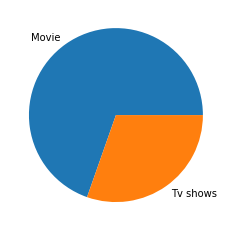

In [25]:
labels = ["Movie", "Tv shows"]
plt.pie(df['type'].value_counts(), labels = labels)
plt.show()

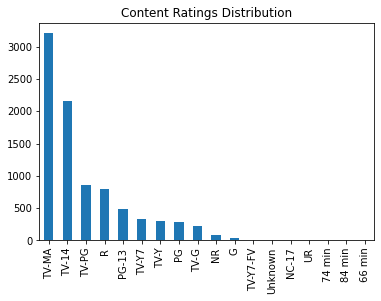

In [51]:
df['rating'].value_counts().plot(kind='bar')
plt.title("Content Ratings Distribution")
plt.show()

## Content Ratings

The distribution of ratings shows that most Netflix content is targeted toward mature audiences, such as TV-MA and similar categories.

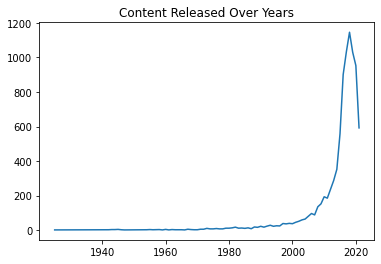

In [52]:
df['release_year'].value_counts().sort_index().plot()
plt.title("Content Released Over Years")
plt.show()

## Content Release Trend

The number of released titles increased significantly in recent years, especially after 2015.  
This reflects Netflix's expansion and investment in original content.

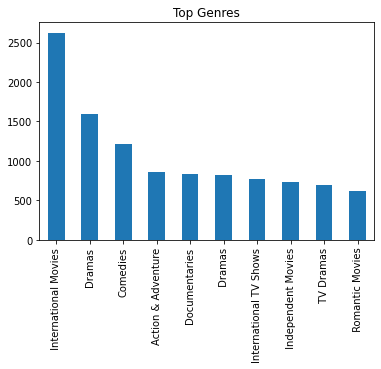

In [53]:
genres = df['listed_in'].str.split(',', expand=True).stack()
genres.value_counts().head(10).plot(kind='bar')
plt.title("Top Genres")
plt.show()

## Popular Genres

Drama, International TV Shows, and Comedy are among the most common genres on Netflix.  
This shows the platform’s focus on diverse and global content.

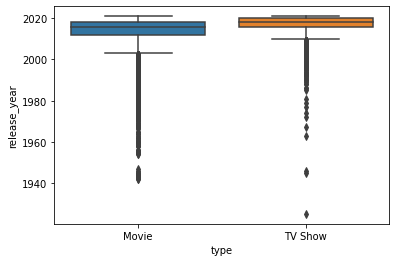

In [54]:
sns.boxplot(x='type', y='release_year', data=df)
plt.show()

## Content Added Over Time

The number of titles added to Netflix increased over the years, indicating rapid growth and continuous content updates.

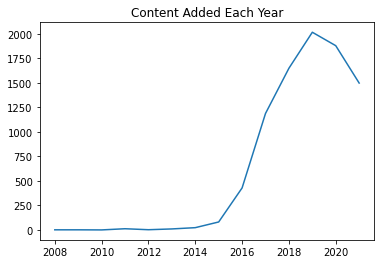

In [55]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot()
plt.title("Content Added Each Year")
plt.show()

In [26]:
# Which director has make most movies and shows
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [27]:
df1 = df[df['director']=='Raúl Campos, Jan Suter']
df1.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4749,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


In [28]:
df1.type.value_counts()

Movie    18
Name: type, dtype: int64

# Cast

**Which cast has work more**

In [29]:
df2 = df.cast.value_counts().head(1)
df2.index.to_list()

['David Attenborough']

In [30]:
print("The cast has work more shows/movies are {}".format(df2.index.to_list()[0]))

The cast has work more shows/movies are David Attenborough


**Top 5 countries which produce most movies/series**

In [31]:
df3 =df['country'].value_counts().head(5)
df3

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

<AxesSubplot:>

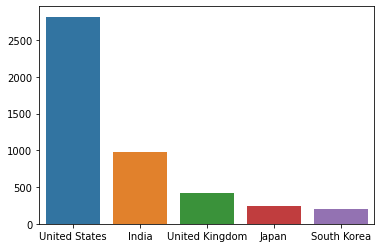

In [32]:
sns.barplot(x=df3.index, y=df3.to_list())

# **Release Year**

**Top 10 years in which more movies release**

In [33]:
df4 = df.release_year.value_counts().head(10)
df4

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

<AxesSubplot:>

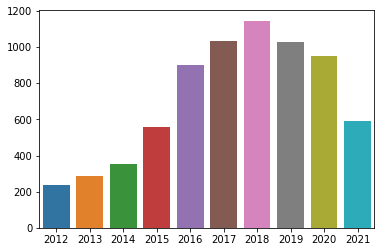

In [34]:
sns.barplot(x=df4.index, y=df4.to_list())

<AxesSubplot:title={'center':'RELEASE RATEs'}>

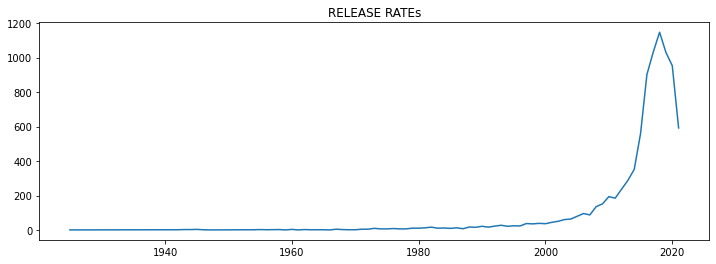

In [35]:
plt.figure(figsize = (12,4))
rate_count = df['release_year'].value_counts()
plt.title("RELEASE RATEs")
sns.lineplot(x =rate_count.index , y= rate_count.values)

# Rating

In [37]:
df["rating"].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

# Duration

In [38]:
df6 = df[df['duration'].str.split(' ').str.get(1)=='min']
df6.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [40]:
df7 = df6.duration.value_counts().sort_values(ascending=False).head(10)
df7

90     152
94     146
93     146
97     146
91     144
95     137
96     130
92     129
102    122
98     120
Name: duration, dtype: int64

<AxesSubplot:>

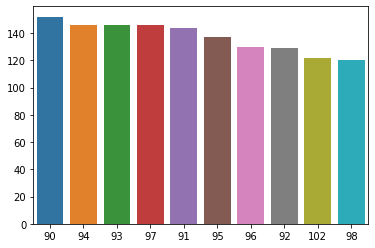

In [41]:
sns.barplot(x=df7.index, y=df7.to_list())

## Conclusion

This exploratory data analysis provided valuable insights into Netflix content.  
The platform mainly focuses on movies, produces content globally, and has increased its content significantly in recent years.  
These insights can help in building recommendation systems and understanding audience preferences.